# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [59]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [57]:
# Starting URL for Weather Map API call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
# Print (url)


# List of City Data
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print ("-" * 15)


# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in list
for index, city in enumerate(cities):
    # Group cities in sets of 50 for loggin purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    
    # Log the URL and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        
        # Extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list
        city_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Windspeed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
    except:
        print("City not found. Skipping ...")
        pass
    # Indicate that data loading is complete
        print("-----------------------")
        print("Data Retrieval Complete")
        print("-----------------------")

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | inhambane
Processing Record 2 of Set 1 | farasan
Processing Record 3 of Set 1 | taiohae
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | pacasmayo
Processing Record 6 of Set 1 | udachny
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | zhigalovo
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | harstad
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | borcka
Processing Record 13 of Set 1 | puerto aysen
Processing Record 14 of Set 1 | sinabang
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | saipan
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | gubkinskiy
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Se

Processing Record 37 of Set 4 | mariara
Processing Record 38 of Set 4 | east ballina
Processing Record 39 of Set 4 | atkarsk
Processing Record 40 of Set 4 | al-`ula
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 41 of Set 4 | pisco
Processing Record 42 of Set 4 | tulun
Processing Record 43 of Set 4 | kolonia
Processing Record 44 of Set 4 | alekseyevskoye
Processing Record 45 of Set 4 | apaxtla de castrejon
Processing Record 46 of Set 4 | batang
Processing Record 47 of Set 4 | colonia
Processing Record 48 of Set 4 | okha
Processing Record 49 of Set 4 | midvagur
Processing Record 0 of Set 5 | port elizabeth
Processing Record 1 of Set 5 | yuzhno-kurilsk
Processing Record 2 of Set 5 | belo sur tsiribihina
Processing Record 3 of Set 5 | erzhausen
Processing Record 4 of Set 5 | riviere-du-loup
Processing Record 5 of Set 5 | candon
Processing Record 6 of Set 5 | sofiyivka
Processing Record 7 of Set 5 | birao
Processing Re

Processing Record 26 of Set 8 | patterson
Processing Record 27 of Set 8 | holualoa
Processing Record 28 of Set 8 | vorkuta
Processing Record 29 of Set 8 | porto de moz
Processing Record 30 of Set 8 | bairnsdale
Processing Record 31 of Set 8 | general acha
Processing Record 32 of Set 8 | inongo
Processing Record 33 of Set 8 | watampone
Processing Record 34 of Set 8 | yorosso
Processing Record 35 of Set 8 | olyokminsk
Processing Record 36 of Set 8 | la tour-du-pin
Processing Record 37 of Set 8 | nogliki
Processing Record 38 of Set 8 | tarariras
Processing Record 39 of Set 8 | pyt-yakh
Processing Record 40 of Set 8 | caromatan
Processing Record 41 of Set 8 | weno
Processing Record 42 of Set 8 | huayin
Processing Record 43 of Set 8 | san luis de la paz
Processing Record 44 of Set 8 | pitiquito
Processing Record 45 of Set 8 | 'ohonua
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 46 of Set 8 | katabu
Processing Record 4

Processing Record 41 of Set 11 | tazacorte
Processing Record 42 of Set 11 | berdigestyakh
Processing Record 43 of Set 11 | parvatsar
Processing Record 44 of Set 11 | metlili chaamba
Processing Record 45 of Set 11 | pechora
Processing Record 46 of Set 11 | manaure
Processing Record 47 of Set 11 | patamda
Processing Record 48 of Set 11 | hilo
Processing Record 49 of Set 11 | eirunepe
Processing Record 0 of Set 12 | verkhnevilyuysk
Processing Record 1 of Set 12 | howard springs
Processing Record 2 of Set 12 | santa marinella
Processing Record 3 of Set 12 | pariaman
Processing Record 4 of Set 12 | tianpeng
Processing Record 5 of Set 12 | ruzayevka
Processing Record 6 of Set 12 | mingyue
Processing Record 7 of Set 12 | oranjemund
Processing Record 8 of Set 12 | qarauyl
Processing Record 9 of Set 12 | tobruk
Processing Record 10 of Set 12 | minas de marcona
Processing Record 11 of Set 12 | nkove
Processing Record 12 of Set 12 | maun
Processing Record 13 of Set 12 | mek'ele
Processing Record 

In [55]:
# Convert array of JSON into Pandas
city_data_df = pd.DataFrame(city_data)


# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Windspeed"]

city_data_df.to_csv("./output_data/cities.csv", index=False)

city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Windspeed     580
Country       580
Date          580
dtype: int64

In [56]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,inhambane,-23.8650,35.3833,70.45,84,4,4.61,MZ,1682483174
1,farasan,16.7022,42.1183,85.06,77,19,7.65,SA,1682483174
2,grytviken,-54.2811,-36.5092,35.85,88,58,15.79,GS,1682483175
3,pacasmayo,-7.4006,-79.5714,75.70,78,95,9.35,PE,1682483175
4,udachny,66.4167,112.4000,28.45,73,100,11.45,RU,1682483175


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [30]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Windspeed"]
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,28.36,65,6,5.19,IS,1682480235
1,bilibino,68.0546,166.4372,30.07,70,1,1.61,RU,1682480235
2,schrobenhausen,48.5500,11.2667,42.28,100,89,5.19,DE,1682480235
3,puerto ayora,-0.7393,-90.3518,77.56,95,87,1.99,EC,1682480236
4,kavaratti,10.5669,72.6420,81.61,71,86,7.29,IN,1682480236


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

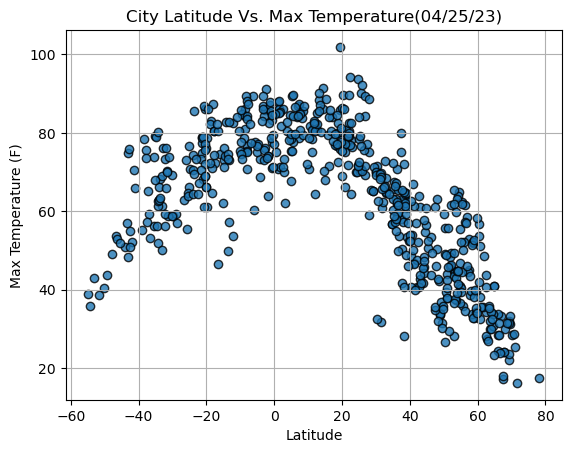

In [31]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

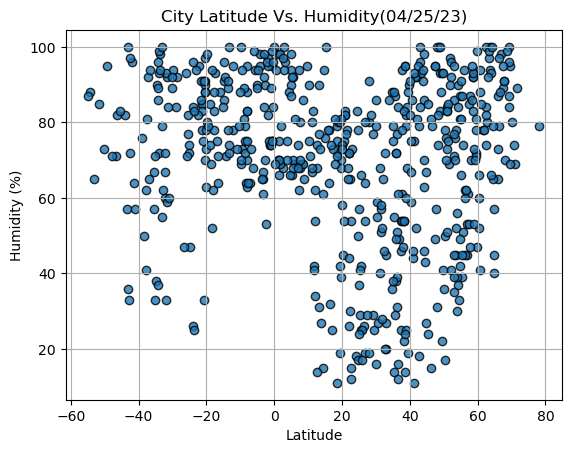

In [35]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

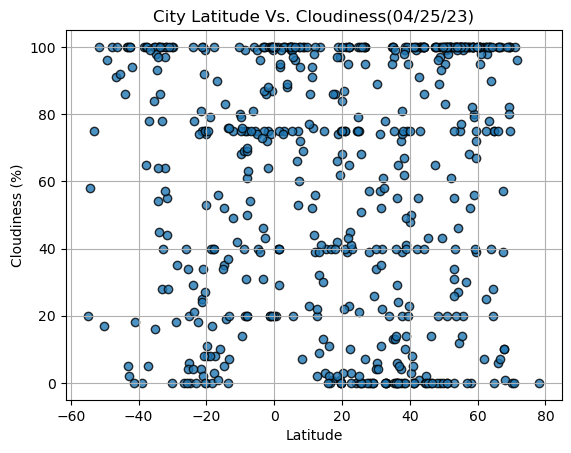

In [38]:
# Build scatter plot for latitude vs. Cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

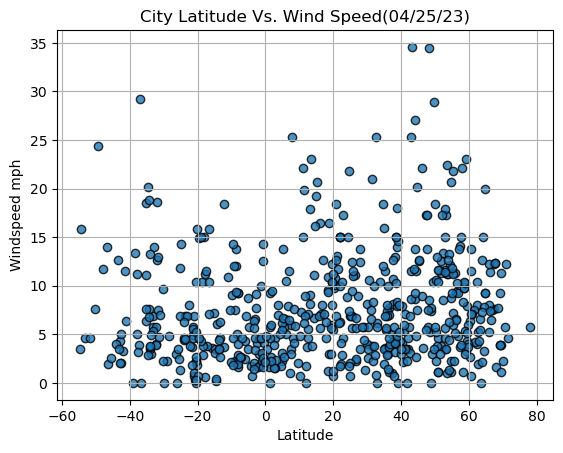

In [39]:
# Build scatter plot for latitude vs. Windspeed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)


# Save figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [79]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [85]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
1,farasan,16.7022,42.1183,85.06,77,19,7.65,SA,1682483174
4,udachny,66.4167,112.4000,28.45,73,100,11.45,RU,1682483175
5,olonkinbyen,70.9221,-8.7187,25.54,69,100,12.26,SJ,1682483176
6,zhigalovo,54.8097,105.1578,32.22,78,100,10.96,RU,1682483176
7,yellowknife,62.4560,-114.3525,34.32,100,100,8.05,CA,1682483177


In [86]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,inhambane,-23.8650,35.3833,70.45,84,4,4.61,MZ,1682483174
2,grytviken,-54.2811,-36.5092,35.85,88,58,15.79,GS,1682483175
3,pacasmayo,-7.4006,-79.5714,75.70,78,95,9.35,PE,1682483175
11,puerto aysen,-45.4000,-72.7000,48.36,95,68,3.24,CL,1682483178
13,bredasdorp,-34.5322,20.0403,56.26,90,93,2.91,ZA,1682483178


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8811935596838781


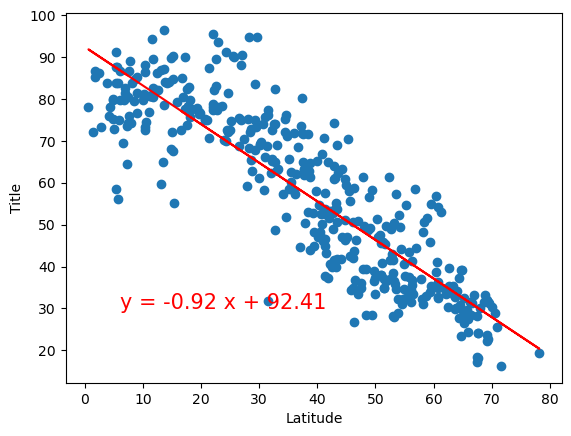

In [90]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.6727968796563866


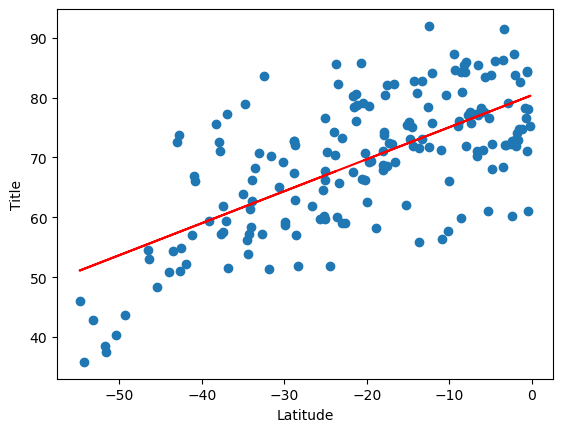

In [92]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1641776987655138


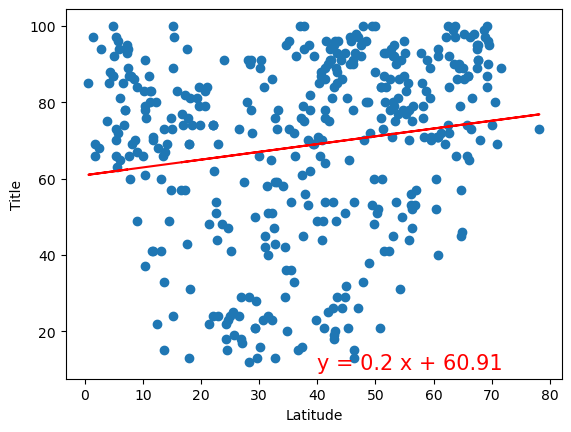

In [93]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.2475578351237064


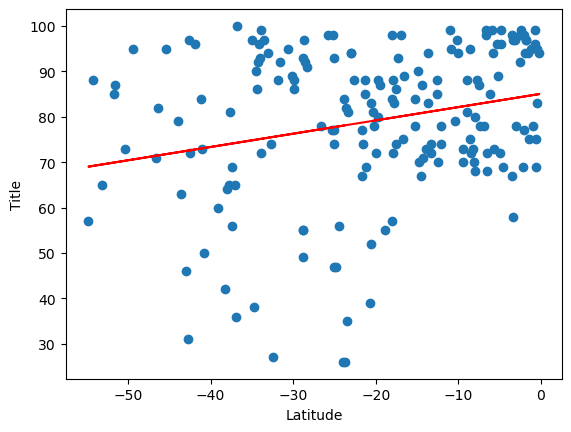

In [94]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.07463495768913349


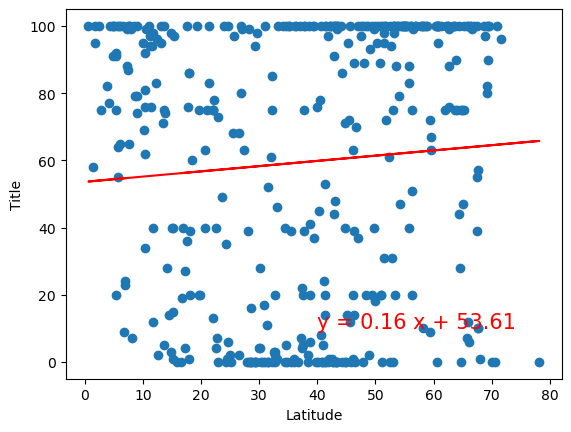

In [95]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.09496621544826502


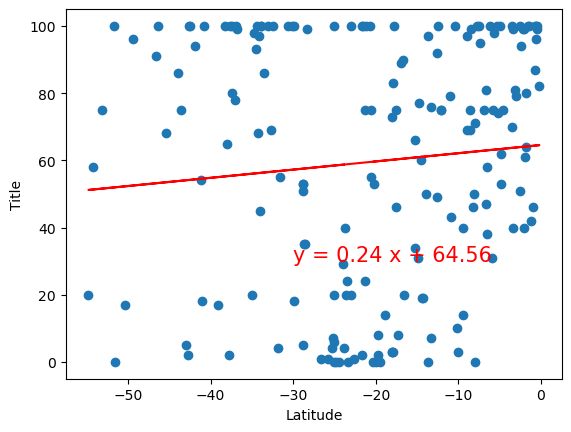

In [96]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.061076145794668094


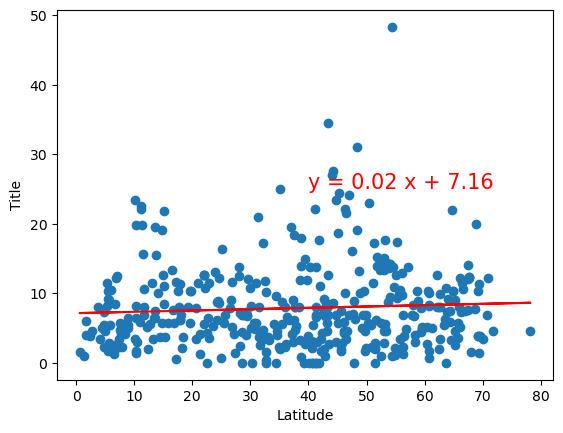

In [97]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

The r-squared is: -0.26042854766733353


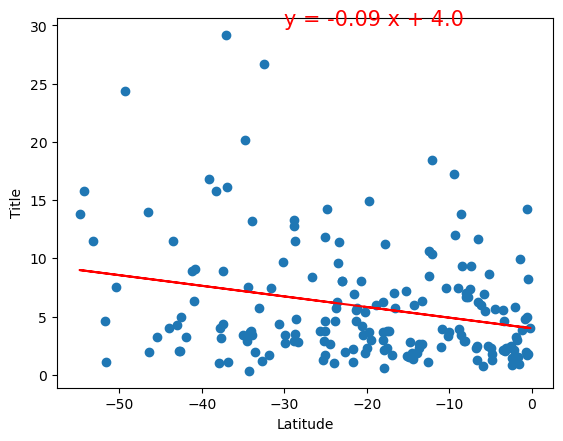

In [98]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE